<a href="https://colab.research.google.com/github/yahyatamim/ClimateExtremePrediction/blob/master/Support_vector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 05/09/2020

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

url = "https://github.com/yahyatamim/ClimateExtremePrediction/blob/master/Transfomed%20indices.xlsx?raw=true"
excelFile = pd.ExcelFile(url)

In [2]:
df = pd.read_excel(excelFile, sheet_name='Barisal', parse_dates=[['Year', 'Month']], index_col='Year_Month')
df.head()

,CDD,CWD,PRCPTOT,R10mm,R20mm,R30mm,Rx1day,Rx3day,Rx5day,DRT,SU,Tnm,Tmm,Txm,Txn,Txx,Tnn,Tnx,TR,TN10p,Tx10p,Tx90p,tmge5,tmge10,Tn90p,Txge30,Txge35,Txgt50p
Year_Month,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1980-01-01,47,0,0,0,0,0,0,0,0,13.75,18,11.81,18.68,25.60,21.8,29.5,7.5,16.0,0,12.90,9.52,12.74,30,30,12.26,0,0,49.52
1980-02-01,35,3,55,3,0,0,18,28,40,13.89,24,14.10,21.04,27.99,22.9,32.0,9.0,21.5,2,20.69,17.07,0.00,29,29,13.79,9,0,45.86
1980-03-01,18,2,47,2,1,0,25,40,40,12.32,27,19.32,25.29,31.57,22.2,34.5,15.0,24.5,10,12.58,11.94,0.00,30,30,3.23,24,0,32.90
1980-04-01,12,1,13,0,0,0,7,9,9,9.44,28,25.30,30.13,34.85,33.6,37.0,20.0,27.5,29,3.33,0.00,12.50,28,28,32.00,28,11,88.00
1980-05-01,8,7,235,9,4,2,45,70,88,9.03,30,24.14,28.54,33.05,27.7,35.8,19.2,28.0,29,12.90,11.29,2.90,30,30,8.39,28,5,46.94


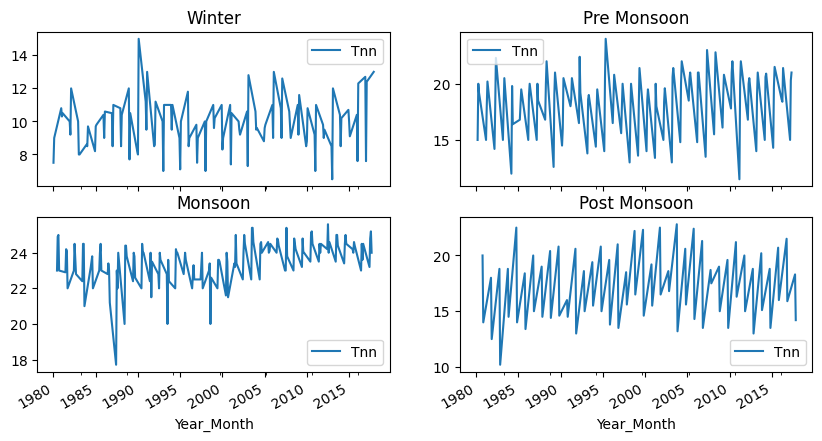

In [3]:
# definition of season is taken from Khan(2020)

winter = df.loc[(df.index.strftime("%b") == 'Dec') | (df.index.strftime("%b") == 'Jan')
                | (df.index.strftime("%b") == 'Feb') , ['Tnn']]

preMonsoon = df.loc[(df.index.strftime("%b") == 'Mar') | (df.index.strftime("%b") == 'Apr')
                    | (df.index.strftime("%b") == 'May') , ['Tnn']]

Monsoon = df.loc[(df.index.strftime("%b") == 'Jun') | (df.index.strftime("%b") == 'Jul')
                    | (df.index.strftime("%b") == 'Aug') | (df.index.strftime("%b") == 'Sep') , ['Tnn']]

postMonsoon = df.loc[(df.index.strftime("%b") == 'Oct') | (df.index.strftime("%b") == 'Nov') , ['Tnn']]


fig, axes = plt.subplots(2, 2, figsize=(10, 5), sharex=True, dpi=100)
winter.plot(ax = axes[0,0], title='Winter')
preMonsoon.plot(ax = axes[0,1], title='Pre Monsoon')
Monsoon.plot(ax = axes[1,0], title='Monsoon')
postMonsoon.plot(ax = axes[1,1], title='Post Monsoon')
plt.show()

In [4]:
from sklearn.preprocessing import StandardScaler

st_winter = StandardScaler()
st_preMonsoon = StandardScaler()
st_monsoon = StandardScaler()
st_postMonsoon = StandardScaler()

df_winter = winter.reset_index()
df_winter['x_axis'] = [i for i in range(1, 115)]
winter_x = df_winter.iloc[:, 2:3].values
winterY_fit = st_winter.fit(df_winter.iloc[:, 1:2])
winterY_trans = st_winter.transform(df_winter.iloc[:, 1:2])
winter_y = winterY_trans.ravel()

df_preMonsoon = preMonsoon.reset_index()
df_preMonsoon['x_axis'] = [i for i in range(1, 115)]
preMonsoon_x = df_preMonsoon.iloc[:, 2:3].values
preMonsoonY_fit = st_preMonsoon.fit(df_preMonsoon.iloc[:, 1:2])
preMonsoonY_trans = st_preMonsoon.transform(df_preMonsoon.iloc[:, 1:2])
preMonsoon_y = preMonsoonY_trans.ravel()

df_monsoon = Monsoon.reset_index()
df_monsoon['x_axis'] = [i for i in range(1, 153)]
monsoon_x = df_monsoon.iloc[:, 2:3].values
monsoonY_fit = st_monsoon.fit(df_monsoon.iloc[:, 1:2])
monsoonY_trans = st_monsoon.transform(df_monsoon.iloc[:, 1:2])
monsoon_y = monsoonY_trans.ravel()

df_postMonsoon = postMonsoon.reset_index()
df_postMonsoon['x_axis'] = [i for i in range(1, 77)]
postMonsoon_x = df_postMonsoon.iloc[:, 2:3].values
postMonsoonY_fit = st_postMonsoon.fit(df_postMonsoon.iloc[:, 1:2])
postMonsoonY_trans = st_postMonsoon.transform(df_postMonsoon.iloc[:, 1:2])
postMonsoon_y = postMonsoonY_trans.ravel()

In [5]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = SVR()
parameters = {'C': [1, 10, 100, 1000],
              'epsilon': [0.1, 0.25, 0.5, 0.75, 0.99],
              'kernel': ['linear', 'rbf'],
             }
###########   winter    ##############
winter_regGS = GridSearchCV(estimator=svr, param_grid=parameters, cv=5)
winter_regGS.fit(winter_x, winter_y)
winterTunedPrams = winter_regGS.best_estimator_
print('Best parameters for winter:\n', winterTunedPrams, '\n\n')
winter_regressor = winterTunedPrams
winter_regressor.fit(winter_x, winter_y)
winter_Z = [[i] for i in range(115, 345)]

###########   preMonsoon    ##############
preMonsoon_regGS = GridSearchCV(estimator=svr, param_grid=parameters, cv=5)
preMonsoon_regGS.fit(preMonsoon_x, preMonsoon_y)
preMonsoonTunedPrams = preMonsoon_regGS.best_estimator_
print('Best parameters for preMonsoon:\n', preMonsoonTunedPrams, '\n\n')
preMonsoon_regressor = preMonsoonTunedPrams
preMonsoon_regressor.fit(preMonsoon_x, preMonsoon_y)
preMonsoon_Z = [[i] for i in range(115, 345)]

###########   monsoon    ##############
monsoon_regGS = GridSearchCV(estimator=svr, param_grid=parameters, cv=5)
monsoon_regGS.fit(monsoon_x, monsoon_y)
monsoonTunedPrams = monsoon_regGS.best_estimator_
print('Best parameters for monsoon:\n', monsoonTunedPrams, '\n\n')
monsoon_regressor = monsoonTunedPrams
monsoon_regressor.fit(monsoon_x, monsoon_y)
monsoon_Z = [[i] for i in range(153, 459)]

###########   postMonsoon    ##############
postMonsoon_regGS = GridSearchCV(estimator=svr, param_grid=parameters, cv=5)
postMonsoon_regGS.fit(postMonsoon_x, postMonsoon_y)
postMonsoonTunedPrams = postMonsoon_regGS.best_estimator_
print('Best parameters for postMonsoon:\n', postMonsoonTunedPrams, '\n\n')
postMonsoon_regressor = postMonsoonTunedPrams
postMonsoon_regressor.fit(postMonsoon_x, postMonsoon_y)
postMonsoon_Z = [[i] for i in range(77, 231)]

Best parameters for winter:
 SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False) 


Best parameters for preMonsoon:
 SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.75, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False) 


Best parameters for monsoon:
 SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.75, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) 


Best parameters for postMonsoon:
 SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.75, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) 




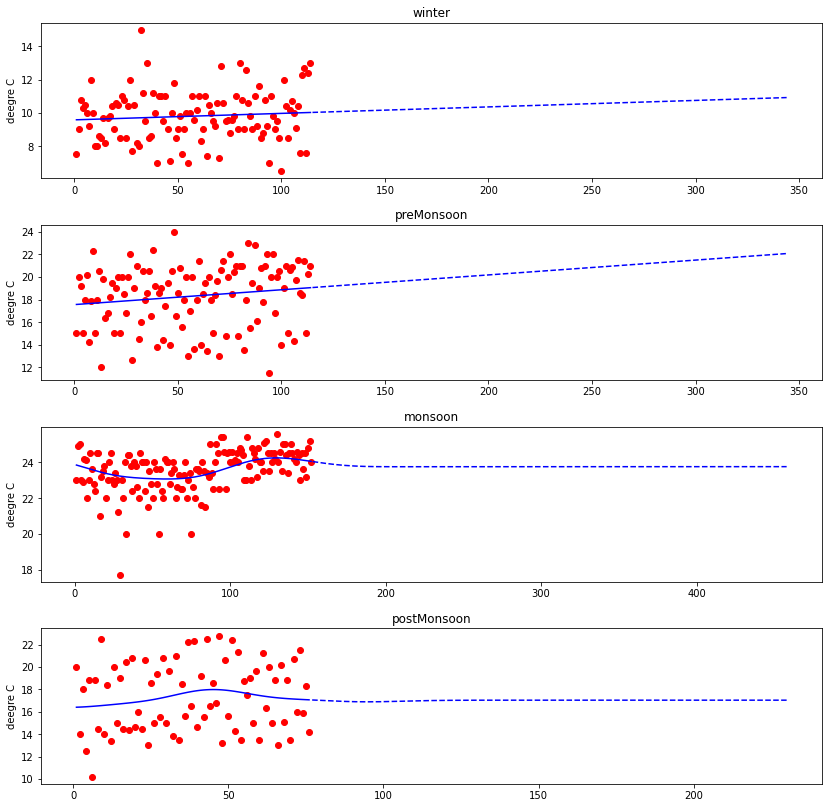

In [7]:
fig, axes = plt.subplots(4,1, figsize=(14,14))

axes[0].scatter(winter_x, winterY_fit.inverse_transform(winter_y), color='r')
axes[0].plot(winter_x, winterY_fit.inverse_transform(winter_regressor.predict(winter_x)), color='b')
axes[0].plot(winter_Z, winterY_fit.inverse_transform(winter_regressor.predict(winter_Z)), color='b', linestyle='--')
axes[0].set_ylabel('deegre C')
axes[0].set_title('winter')

axes[1].scatter(preMonsoon_x, preMonsoonY_fit.inverse_transform(preMonsoon_y), color='r')
axes[1].plot(preMonsoon_x, preMonsoonY_fit.inverse_transform(preMonsoon_regressor.predict(preMonsoon_x)), color='b')
axes[1].plot(preMonsoon_Z, preMonsoonY_fit.inverse_transform(preMonsoon_regressor.predict(preMonsoon_Z)), color='b', linestyle='--')
axes[1].set_ylabel('deegre C')
axes[1].set_title('preMonsoon')

axes[2].scatter(monsoon_x, monsoonY_fit.inverse_transform(monsoon_y), color='r')
axes[2].plot(monsoon_x, monsoonY_fit.inverse_transform(monsoon_regressor.predict(monsoon_x)), color='b')
axes[2].plot(monsoon_Z, monsoonY_fit.inverse_transform(monsoon_regressor.predict(monsoon_Z)), color='b', linestyle='--')
axes[2].set_ylabel('deegre C')
axes[2].set_title('monsoon')

axes[3].scatter(postMonsoon_x, postMonsoonY_fit.inverse_transform(postMonsoon_y), color='r')
axes[3].plot(postMonsoon_x, postMonsoonY_fit.inverse_transform(postMonsoon_regressor.predict(postMonsoon_x)), color='b')
axes[3].plot(postMonsoon_Z, postMonsoonY_fit.inverse_transform(postMonsoon_regressor.predict(postMonsoon_Z)), color='b', linestyle='--')
axes[3].set_ylabel('deegre C')
axes[3].set_title('postMonsoon')

fig.subplots_adjust(hspace=0.3)
plt.show()